Customer Churn Prediction


Step 1. Imports


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

# SkLearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Display settings

sns.set_theme(style='whitegrid',palette='muted',font_scale=1.05)

Step 2. Load the data

In [3]:
# Load dataset
df = pd.read_csv('Customer churn data.csv')
print("Shape",df.shape)
df.head()



Shape (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Step 3. Initial inspection

In [4]:
# Info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [5]:
print(df.describe())


        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [7]:
# Missing Values
print(df.isnull().sum())


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [8]:
# Target Distribution
print(df['churn'].value_counts())

churn
0    7963
1    2037
Name: count, dtype: int64


Step 4. Exploratory Data Analysis (visualizations)

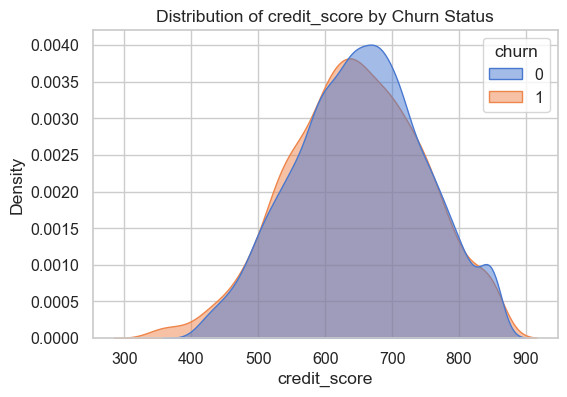

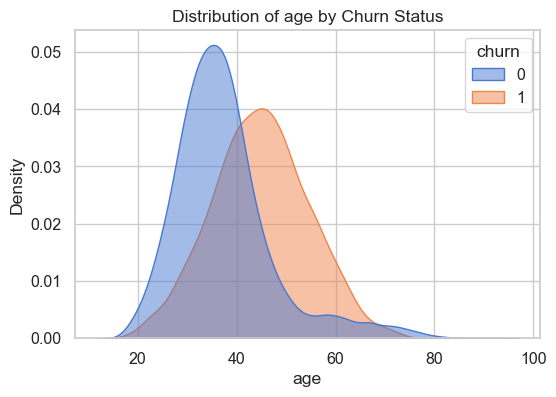

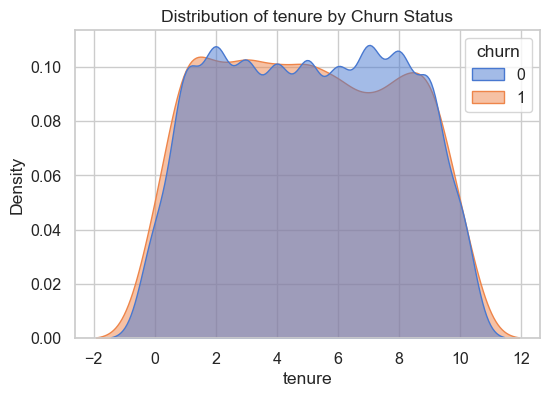

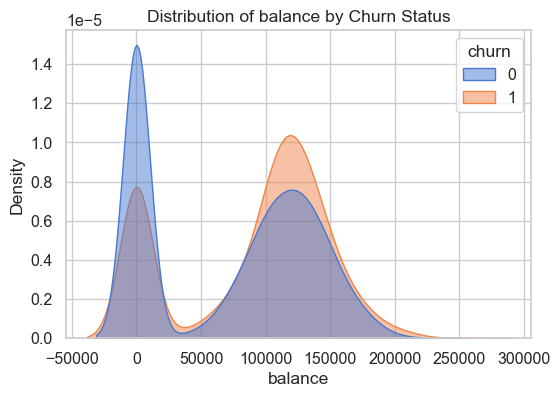

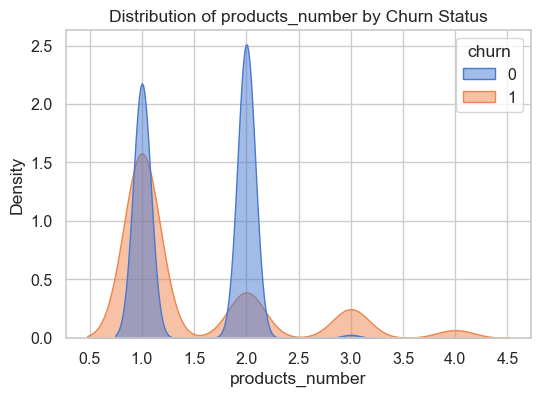

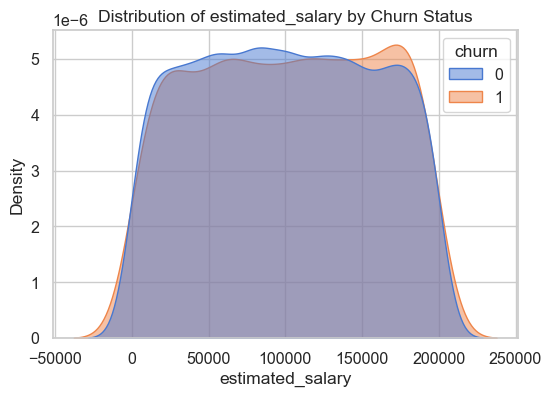

In [ ]:
nums_cols=['credit_score','age','tenure','balance','products_number','estimated_salary']

for cols in nums_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=cols, hue='churn', fill=True, alpha=0.5, common_norm=False)  #
    plt.title(f'Distribution of {cols} by Churn Status')
    plt.show()

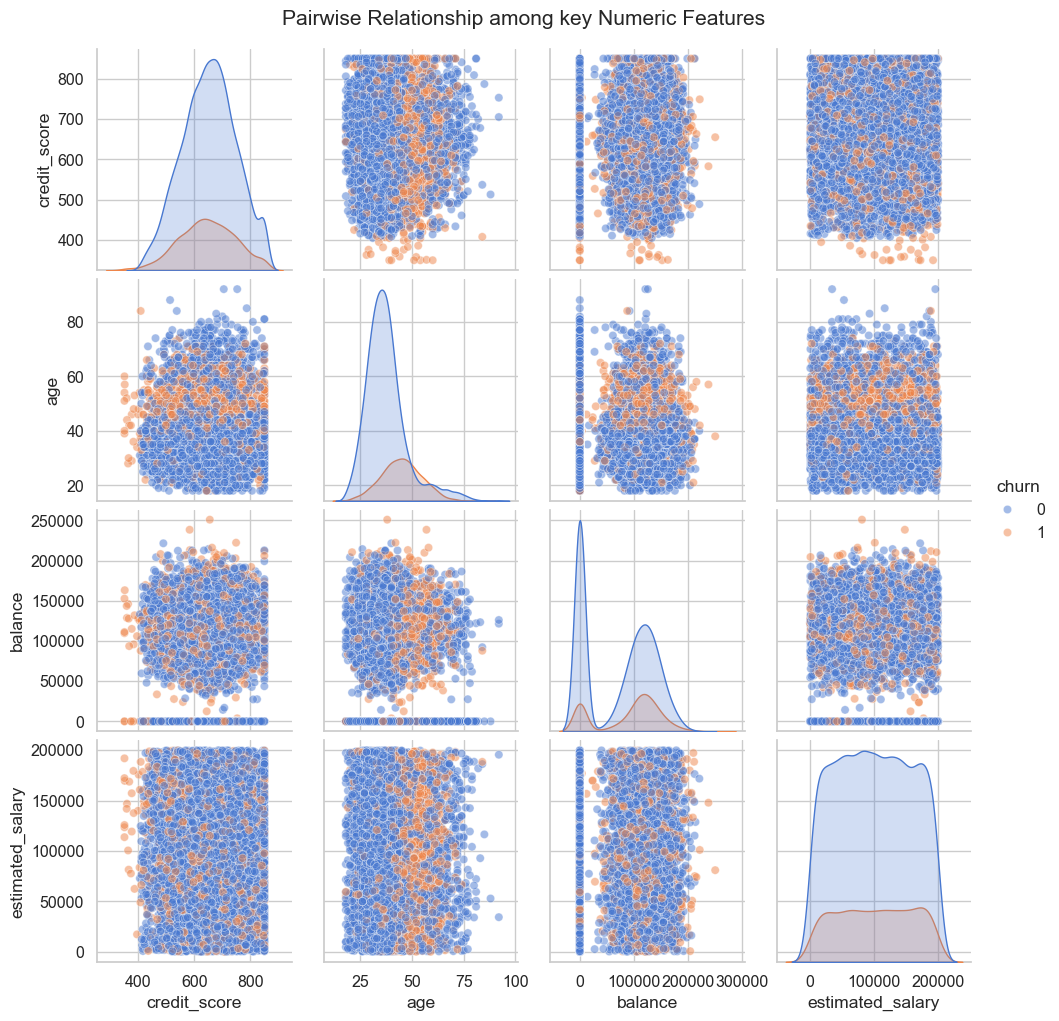

In [12]:
# Pair plot 
sns.pairplot(df,vars=['credit_score','age','balance','estimated_salary'],hue='churn',diag_kind='kde',plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationship among key Numeric Features',y=1.02)
plt.show()

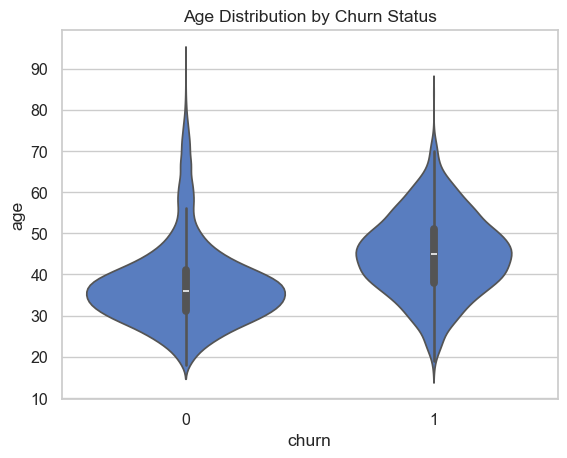

In [14]:
# Violin plots 
sns.violinplot(x='churn', y='age', data=df)
plt.title('Age Distribution by Churn Status')
plt.show()

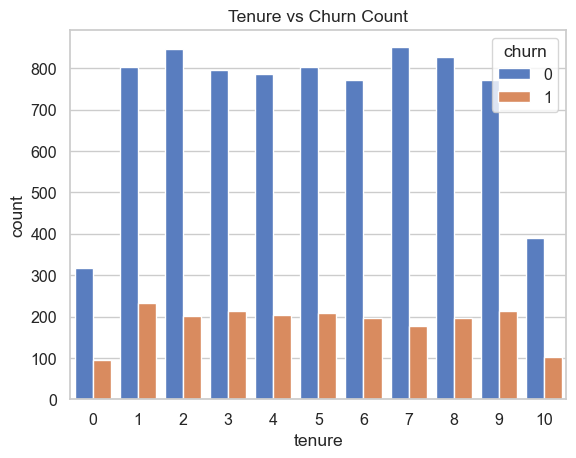

In [15]:
# Tenure vs Churn
sns.countplot(x='tenure', hue='churn', data=df)
plt.title('Tenure vs Churn Count')
plt.show()

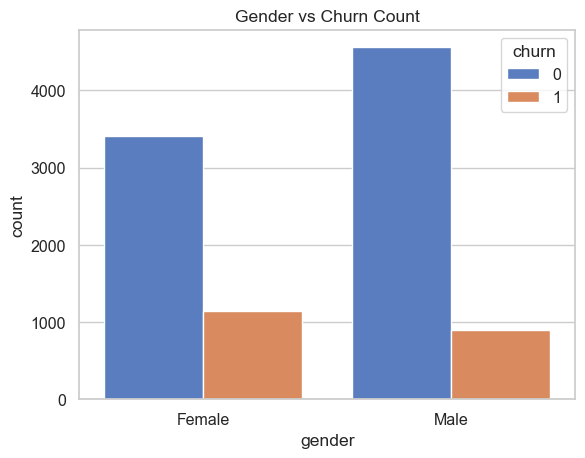

In [19]:
# Gender vs Churn
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Gender vs Churn Count')
plt.show()

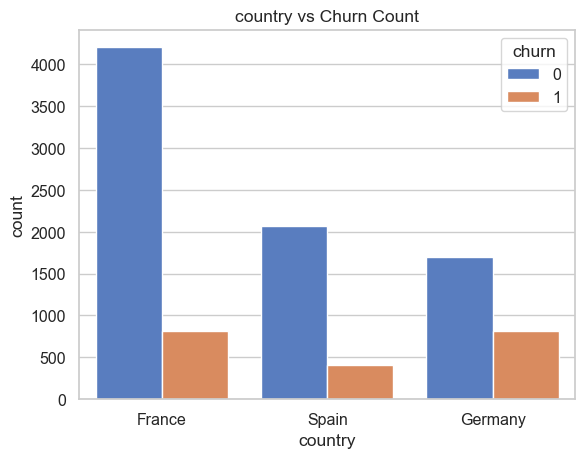

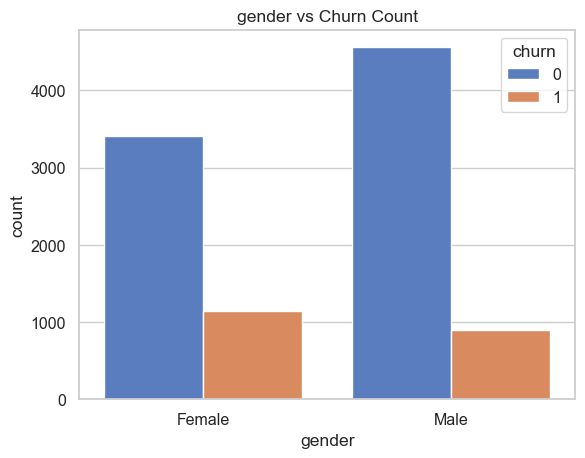

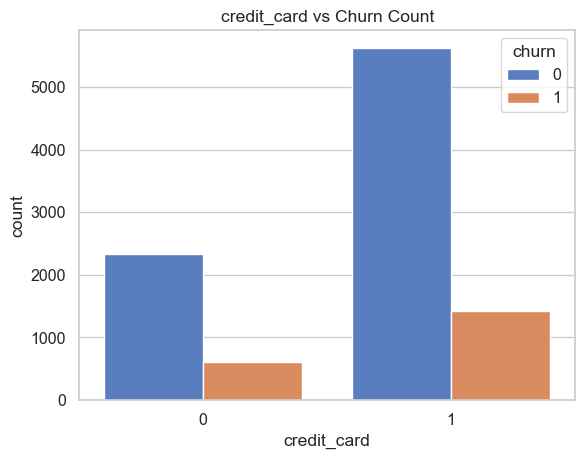

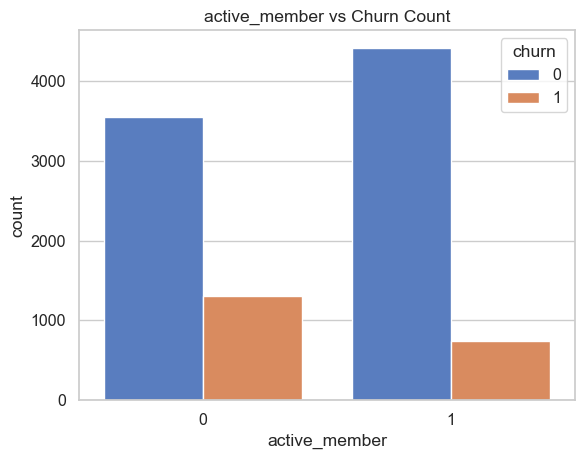

In [20]:
# Categorical Features Distribution
cat_cols=['country','gender','credit_card','active_member']
for cols in cat_cols:
    sns.countplot(x=cols,hue='churn',data=df)
    plt.title(f'{cols} vs Churn Count')
    plt.show()

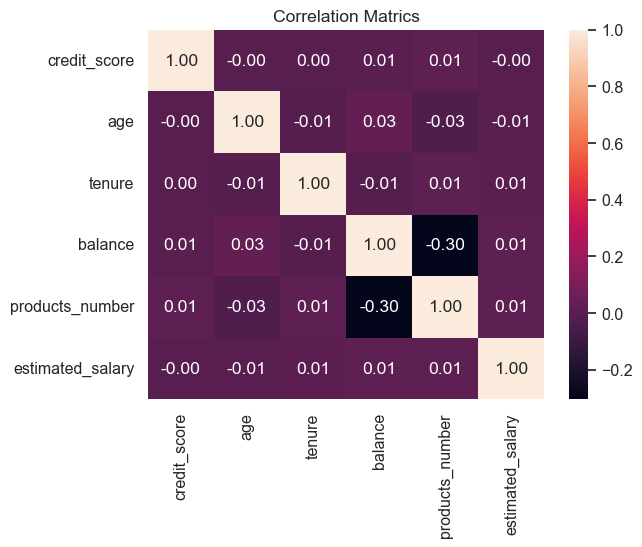

In [34]:
# Heatmap visualization
corr=df[nums_cols].corr()
sns.heatmap(corr,annot=True,fmt='.2f')
plt.title('Correlation Matrics')
plt.show()

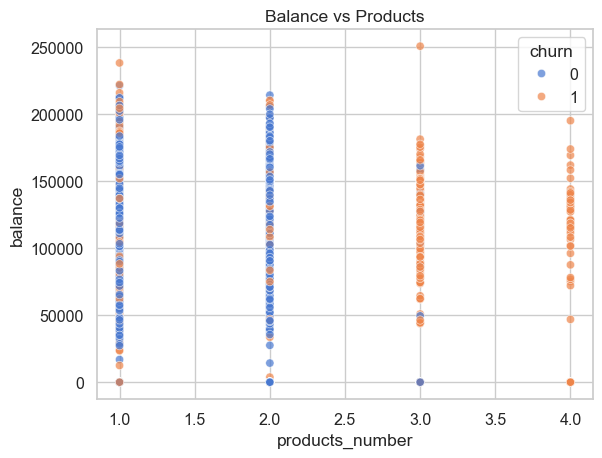

In [38]:
# Balance vs Products scatter
sns.scatterplot(data=df,x='products_number',y='balance',hue='churn',alpha=0.7)
plt.title('Balance vs Products')
plt.show()

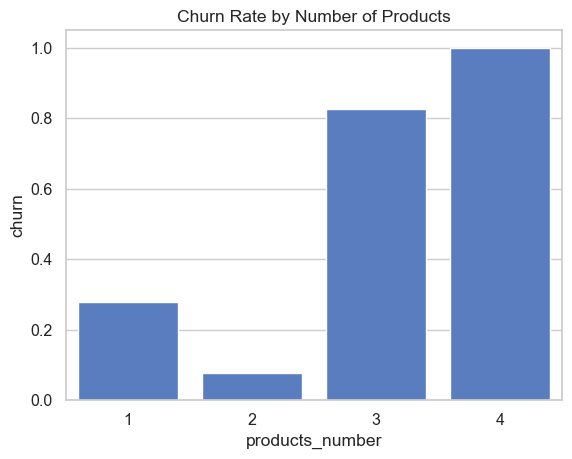

In [39]:
churn_rate=df.groupby('products_number')['churn'].mean().reset_index()
sns.barplot(data=churn_rate,x='products_number',y='churn')
plt.title('Churn Rate by Number of Products')       
plt.show()

Step 5. Feature Enginnering


In [ ]:
# Balance per product
df['Balance_per_product']=df['balance']/df['products_number'].replace(0,np.nan)
df['Balance_per_product'].fillna(0,inplace=True)

# Salary to balance ratio
df['salary_balance_ratio']=df['estimated_salary']/df['balance'].replace(0,np.nan)
